**Import Libraries Needed **

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Freddy Weights Filepath: /kaggle/input/d/freddyboelter/resnet-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
import os
labels = []
image_path = []
for dirname, _, filenames in os.walk('/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            image_path.append(os.path.join(dirname, filename))
            labels.append(os.path.basename(os.path.normpath(dirname)))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Train Test Split
images_train, images_test, labels_train, labels_test = train_test_split(image_path, labels, test_size=0.25, random_state=10, stratify=labels)

In [4]:
model = ResNet50(include_top=False, input_shape=(200,200,3), weights = "/kaggle/input/d/freddyboelter/resnet-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")
for layer in model.layers:
    layer.trainable = False

#add new classifier layers 

flat1 = Flatten()(model.output)
class1 = Dense(1024, activation = 'relu')(flat1)
drop_layer = Dropout(0.2)(class1)
output = Dense(196, activation = 'softmax')(drop_layer)
model = Model(inputs = model.inputs, outputs = output)
    

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ['accuracy'])

In [5]:

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

#preprocessing
train_folder = "../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train"
test_folder = "../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test"

#grabbing different images
train_generator = data_generator.flow_from_directory(train_folder, target_size=(200, 200), class_mode='categorical')
test_generator = data_generator.flow_from_directory(test_folder, target_size=(200, 200), class_mode='categorical')

history=model.fit(train_generator, steps_per_epoch=10, validation_data=test_generator, validation_steps=1, epochs=100)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Epoch 1/100
10/10 [==============================] - 39s 3s/step - loss: 39.5128 - accuracy: 0.0125 - val_loss: 6.6986 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 35s 4s/step - loss: 5.4953 - accuracy: 0.0156 - val_loss: 5.2286 - val_accuracy: 0.0312
Epoch 3/100
10/10 [==============================] - 35s 3s/step - loss: 5.3086 - accuracy: 0.0063 - val_loss: 5.2684 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 33s 3s/step - loss: 5.2720 - accuracy: 0.0094 - val_loss: 5.3410 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 33s 3s/step - loss: 5.2720 - accuracy: 0.0094 - val_loss: 5.3664 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 31s 3s/step - loss: 5.2847 - accuracy: 0.0296 - val_loss: 5.2885 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==========================

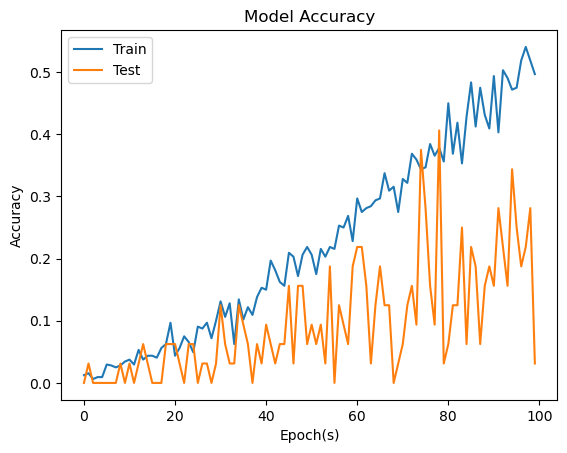

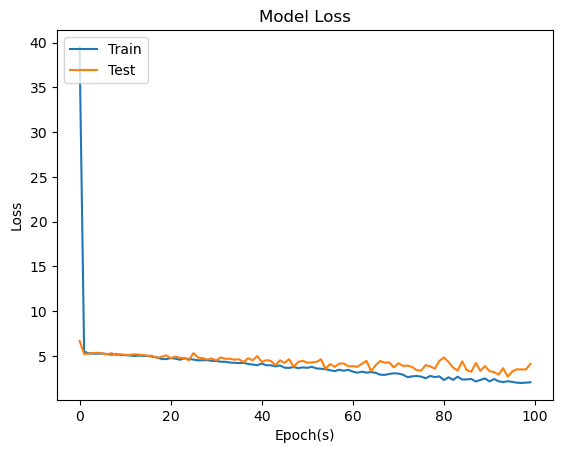

In [6]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch(s)')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch(s)')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
model.predict(test_generator)

252/252 [==============================] - 682s 3s/step


array([[5.10754944e-07, 1.43201891e-04, 3.22849119e-05, ...,
        8.63174093e-04, 4.37566596e-05, 1.33542242e-04],
       [2.09768186e-04, 2.42200098e-04, 4.33609763e-04, ...,
        1.36835035e-03, 3.58372442e-02, 8.43641101e-05],
       [2.00985232e-06, 4.55893716e-03, 3.60245211e-03, ...,
        7.58762239e-04, 6.35060569e-05, 2.14733346e-03],
       ...,
       [2.19533376e-05, 2.39943023e-04, 6.40042126e-04, ...,
        1.79575494e-04, 3.63950712e-05, 4.15687737e-06],
       [1.08055465e-04, 9.60997830e-04, 7.52326697e-02, ...,
        5.42814424e-03, 5.42453723e-04, 1.88418184e-04],
       [1.31043157e-06, 3.53035750e-04, 9.71698591e-06, ...,
        1.19474025e-04, 6.93899835e-07, 1.47617839e-05]], dtype=float32)

In [8]:
model.save('/kaggle/working')

In [9]:
# confusion matrix 
# top 5/10 predictions
#